# Titanic

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

In [14]:
dftrain.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [15]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


In [16]:
dftrain['survived'].value_counts(normalize=True).to_frame()

,survived
0,0.61244
1,0.38756


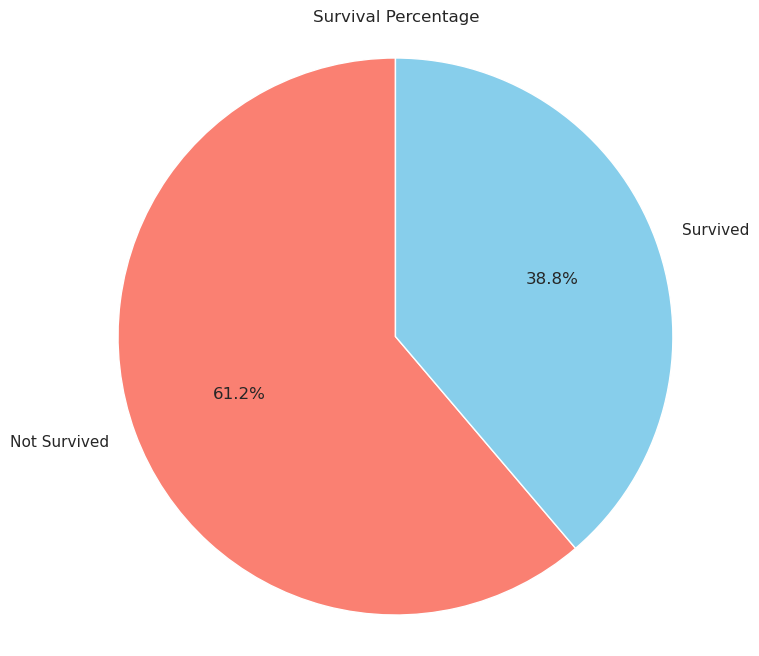

In [17]:
survival_counts = dftrain['survived'].value_counts()
labels = ['Not Survived', 'Survived']

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', colors=['salmon', 'skyblue'], startangle=90)
plt.title('Survival Percentage')
plt.axis('equal')

plt.show()

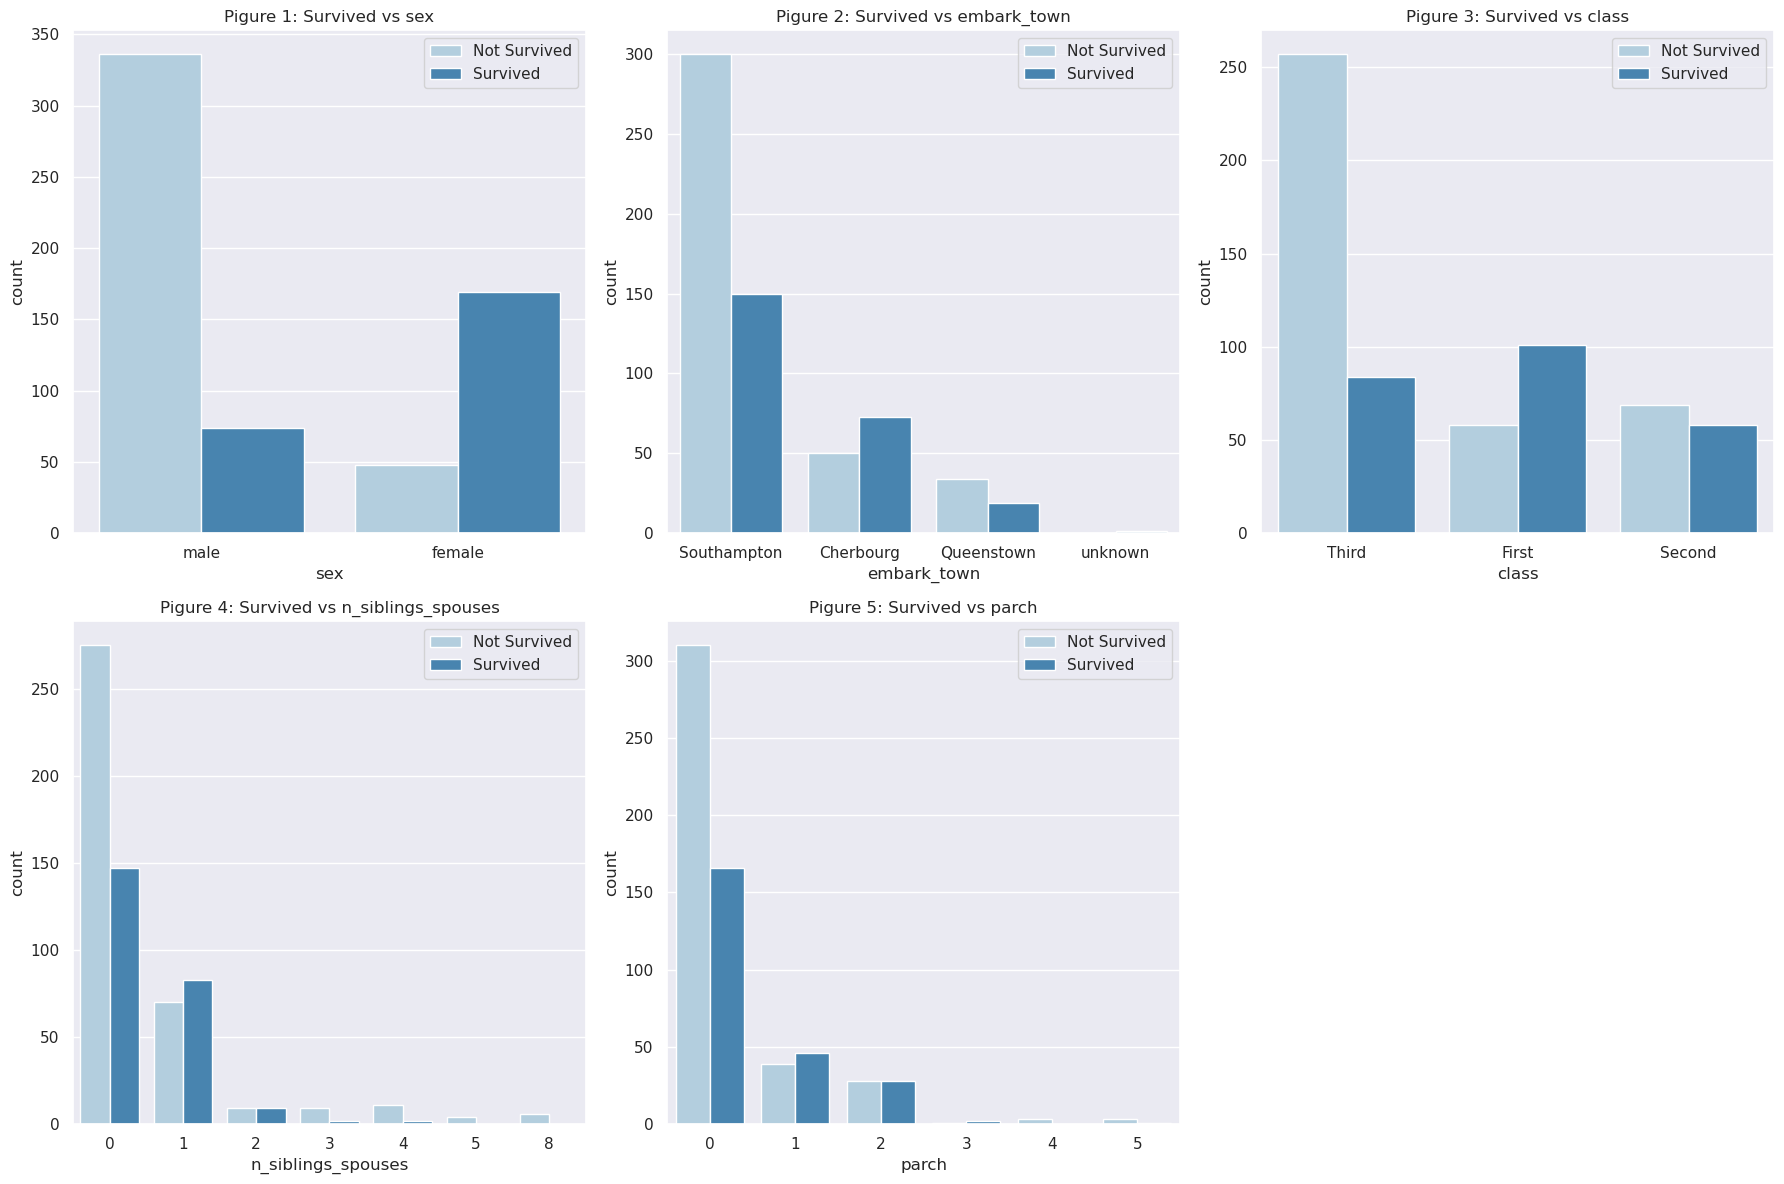

In [18]:
cols = ['sex', 'embark_town', 'class', 'n_siblings_spouses', 'parch']
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*6))
for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c
    if i < len(cols):
      ax_i = ax[r,c]
      sns.countplot(data=dftrain, x=cols[i], hue='survived', palette='Blues', ax=ax_i)
      ax_i.set_title(f"Pigure {i+1}: Survived vs {cols[i]}")
      ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])

ax.flat[-1].set_visible(False)
plt.tight_layout()

In [20]:
dftrain['class'].value_counts(normalize=True).to_frame()

,class
Third,0.543860
First,0.253589
Second,0.202552


In [21]:
dftrain['embark_town'].value_counts(normalize=True).to_frame()

,embark_town
Southampton,0.717703
Cherbourg,0.196172
Queenstown,0.084530
unknown,0.001595


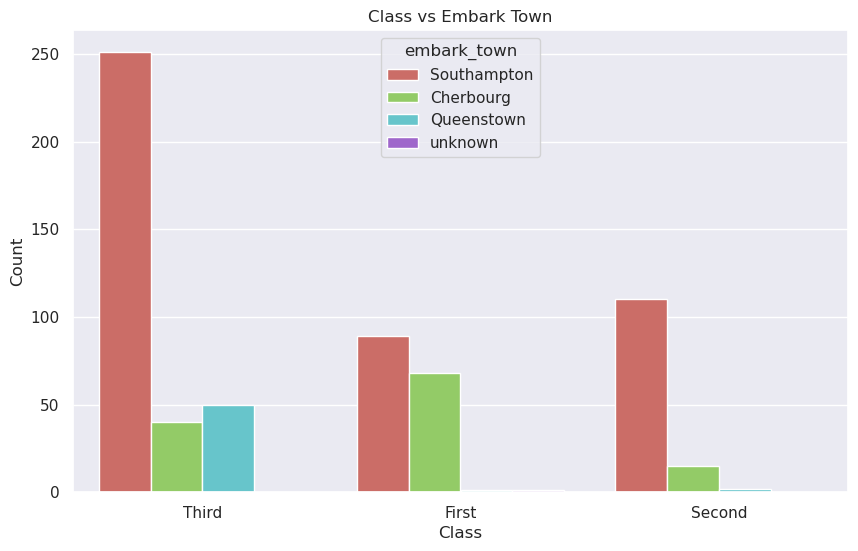

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dftrain, x='class', hue='embark_town', palette='hls')
plt.title('Class vs Embark Town')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

Text(0.5, 1.0, 'survival rate by age')

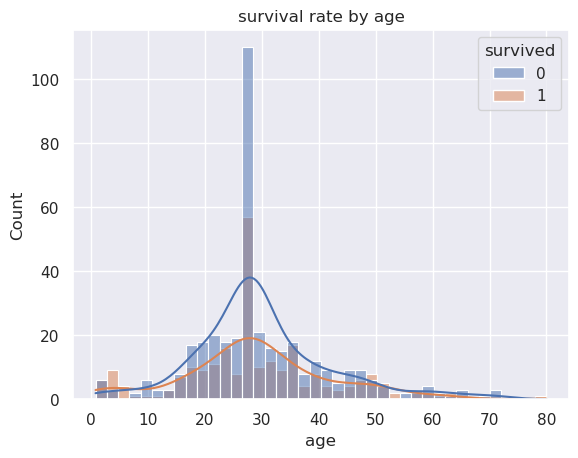

In [23]:
sns.histplot(data=dftrain, x='age', hue='survived', bins = 40, kde=True)
plt.gca().set_title('survival rate by age')

In [24]:
dftrain['fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.4583
        ...   
622    10.5000
623     7.0500
624    30.0000
625    23.4500
626     7.7500
Name: fare, Length: 627, dtype: float64

In [25]:
pd.qcut(dftrain['fare'], 4)

0        (-0.001, 7.896]
1      (31.388, 512.329]
2        (7.896, 15.046]
3      (31.388, 512.329]
4        (7.896, 15.046]
             ...        
622      (7.896, 15.046]
623      (-0.001, 7.896]
624     (15.046, 31.388]
625     (15.046, 31.388]
626      (-0.001, 7.896]
Name: fare, Length: 627, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.896] < (7.896, 15.046] < (15.046, 31.388] < (31.388, 512.329]]

<AxesSubplot:xlabel='fare', ylabel='count'>

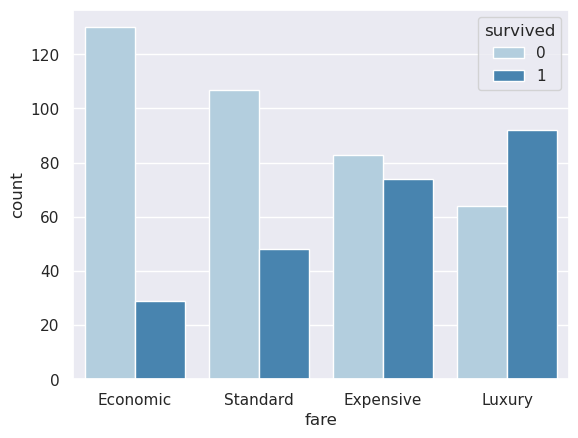

In [26]:
from pandas.tseries.offsets import QuarterBegin
#To name for 0-25% quartile, 25-50, 50-75, 75-100

fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(dftrain['fare'], 4, labels=fare_categories)

sns.countplot(x=quartile_data, hue=dftrain['survived'], palette='Blues')

In [27]:
gender_percentage = dftrain["sex"].value_counts(normalize=True) * 100
age_percentage = (dftrain["age"].value_counts(normalize=True) * 100).sort_index()
print("Tỷ lệ phần trăm của giới tính:")
print(gender_percentage)
print("\nTỷ lệ phần trăm của tuổi:")
print(age_percentage)

Tỷ lệ phần trăm của giới tính:
male      65.39075
female    34.60925
Name: sex, dtype: float64

Tỷ lệ phần trăm của tuổi:
0.75     0.318979
0.83     0.159490
1.00     0.478469
2.00     0.956938
3.00     0.637959
           ...   
66.00    0.159490
70.00    0.159490
70.50    0.159490
71.00    0.318979
80.00    0.159490
Name: age, Length: 76, dtype: float64


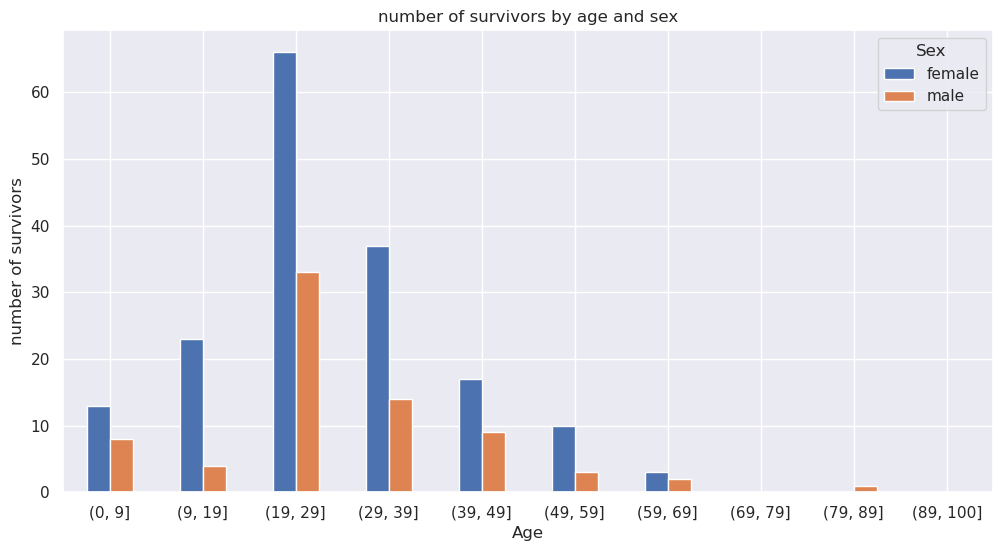

In [28]:
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 100]
age_groups = pd.cut(dftrain["age"], bins)
age_gender_groups = dftrain.groupby([age_groups, "sex"])["survived"].sum().unstack()
age_gender_groups.plot(kind="bar", figsize=(12, 6))
plt.title("number of survivors by age and sex")
plt.ylabel("number of survivors")
plt.xlabel("Age")
plt.xticks(rotation=0)
plt.legend(title="Sex")
plt.show()


Text(0, 0.5, 'fare')

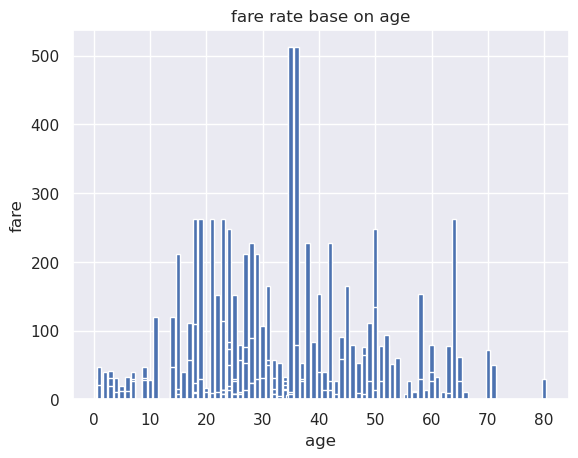

In [29]:
plt.bar(dftrain['age'],dftrain['fare'])
plt.title('fare rate base on age')
plt.xlabel('age')
plt.ylabel('fare')

<function matplotlib.pyplot.show(close=None, block=None)>

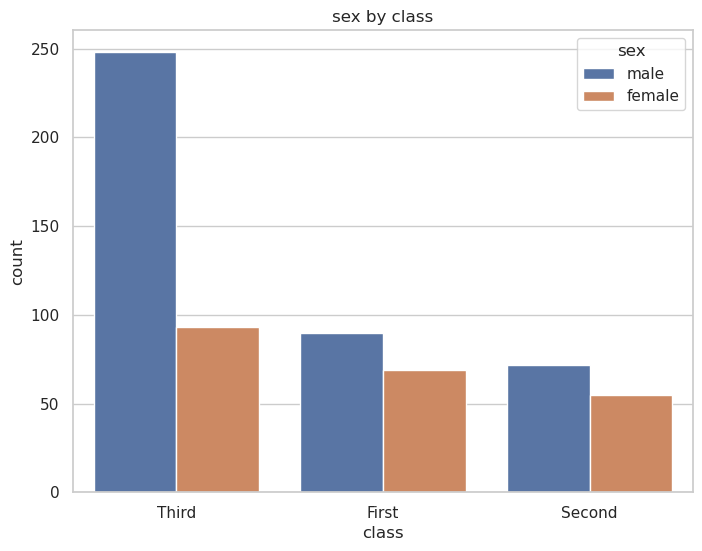

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='sex', data = dftrain)
plt.title('sex by class')
plt.xlabel('class')
plt.ylabel('count')
plt.show

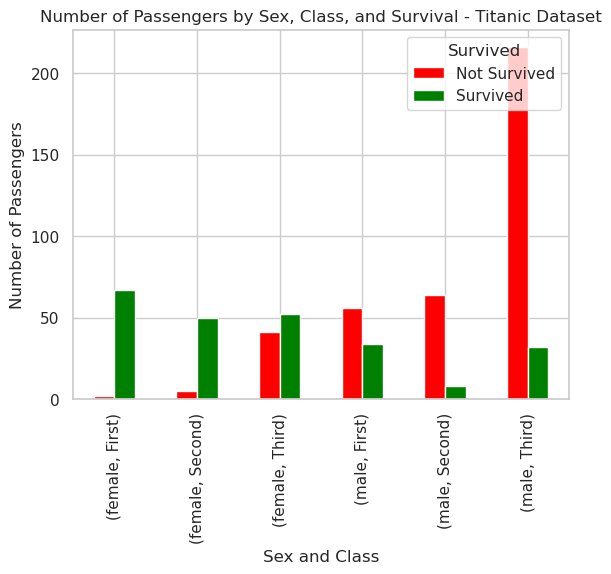

In [31]:
survival_counts = dftrain.groupby(['sex', 'class'])['survived'].value_counts().unstack()

# Plot the grouped bar chart with custom colors
ax = survival_counts.plot(kind='bar', stacked=False, color=['red', 'green'])
plt.xlabel('Sex and Class')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers by Sex, Class, and Survival - Titanic Dataset')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()